In [3]:
%pip install factor_analyzer


     ---------------------------------------- 0.0/42.8 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.8 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.8 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 42.8/42.8 kB 296.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42624 sha256=2ece4c8881db978cab76ee50792fbee884b083da8e1b17fe8e03d277ff72899d
  Stored in directory: c:\users\theroot\appdata\local\pip\cache\wheels\fa\f7\53\a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


# Interpretation of Results 
The factor loadings represent the correlation between each feature and the extracted factors.
High absolute values indicate a strong relationship between a feature and a factor.
We can interpret each factor based on the features that load highly onto it.
The variance explained and uniqueness metrics help assess the contribution and reliability of each factor.
Notice that the greater ‘uniqueness’ the lower the relevance of the variable in the factor model number of factors should be << than number of obs Varimax maximizes the variance in the loadings and is the most popular rotation

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from factor_analyzer import FactorAnalyzer

In [7]:
df = pd.read_csv('student_data.csv')
# Quick overview of the dataset
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [10]:
# Handling missing values - fill missing values with the median
df.fillna(df.median(), inplace=True)

# Encode categorical variables if any
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Standardize the features
scaler = StandardScaler()
features = df.drop('GradeClass', axis=1)
features_scaled = scaler.fit_transform(features)

# Define target variable
target = df['GradeClass']

# Correlation Matrix

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Between Variables')
plt.show()

# **5 Factors**

In [11]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=5, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', n_factors=5, rotation='varimax', rotation_kwargs={})

In [12]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(5)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2  Factor_3  Factor_4  Factor_5
StudentID         -0.009645  0.003500 -0.003904  0.030513  0.023077
Age                0.009943  0.032634 -0.013573 -0.009711 -0.058202
Gender            -0.019673  0.010774 -0.027593  0.018614  0.025897
Ethnicity          0.027191  0.018842 -0.019089  0.005798  0.001478
ParentalEducation -0.039457 -0.012831 -0.014029 -0.003357  0.024616
StudyTimeWeekly    0.133338 -0.011445  0.095177  0.982438 -0.053363
Absences          -0.978078  0.093343  0.097755  0.136039  0.040345
Tutoring           0.098931 -0.040173  0.988331 -0.081027 -0.015329
ParentalSupport    0.099510  0.991474  0.031870  0.030824 -0.010574
Extracurricular    0.017307 -0.005793  0.008884 -0.004912  0.392097
Sports            -0.019501 -0.001343  0.016678  0.028702  0.374660
Music              0.025097  0.035330 -0.007405  0.018164  0.223886
Volunteering       0.010540 -0.005118 -0.054097 -0.013818 -0.012007
GPA    

In [13]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.998416
Age                  0.995170
Gender               0.997718
Ethnicity            0.998505
ParentalEducation    0.997464
StudyTimeWeekly      0.004999
Absences             0.004960
Tutoring             0.004999
ParentalSupport      0.004998
Extracurricular      0.845824
Sports               0.858146
Music                0.947612
Volunteering         0.996601
GPA                  0.004954
dtype: float64


In [14]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(5)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.940626                0.138616             0.138616
Factor_2     1.005211                0.071801             0.210417
Factor_3     1.005019                0.071787             0.282204
Factor_4     0.997171                0.071227             0.353431
Factor_5     0.391604                0.027972             0.381402


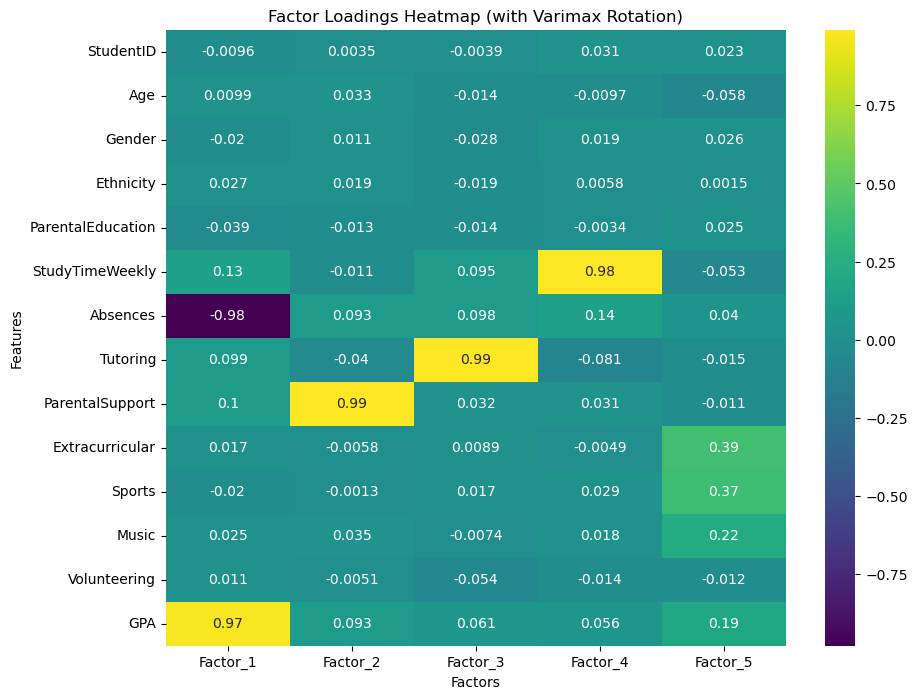

In [15]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **3 Factors**

In [21]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', rotation='varimax', rotation_kwargs={})

In [23]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(3)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2  Factor_3
StudentID         -0.012120  0.003037  0.031596
Age                0.012162  0.034497 -0.049619
Gender            -0.019116  0.009879  0.014944
Ethnicity          0.028199  0.017747 -0.001684
ParentalEducation -0.038090 -0.013111  0.004770
StudyTimeWeekly    0.033509  0.006318  0.533241
Absences          -0.987395  0.121502  0.073228
Tutoring           0.043581 -0.024280  0.376871
ParentalSupport    0.123151  0.988668  0.048705
Extracurricular    0.019811 -0.023777  0.271816
Sports            -0.020607 -0.017005  0.280714
Music              0.026031  0.024468  0.166206
Volunteering       0.015098 -0.005968 -0.040497
GPA                0.958410  0.060262  0.270007


In [24]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.998846
Age                  0.996200
Gender               0.999314
Ethnicity            0.998887
ParentalEducation    0.998354
StudyTimeWeekly      0.714492
Absences             0.004927
Tutoring             0.855479
ParentalSupport      0.004997
Extracurricular      0.925158
Sports               0.920486
Music                0.971099
Volunteering         0.998096
GPA                  0.004915
dtype: float64


In [25]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(3)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.916315                0.136880             0.136880
Factor_2     0.999761                0.071411             0.208291
Factor_3     0.692674                0.049477             0.257768


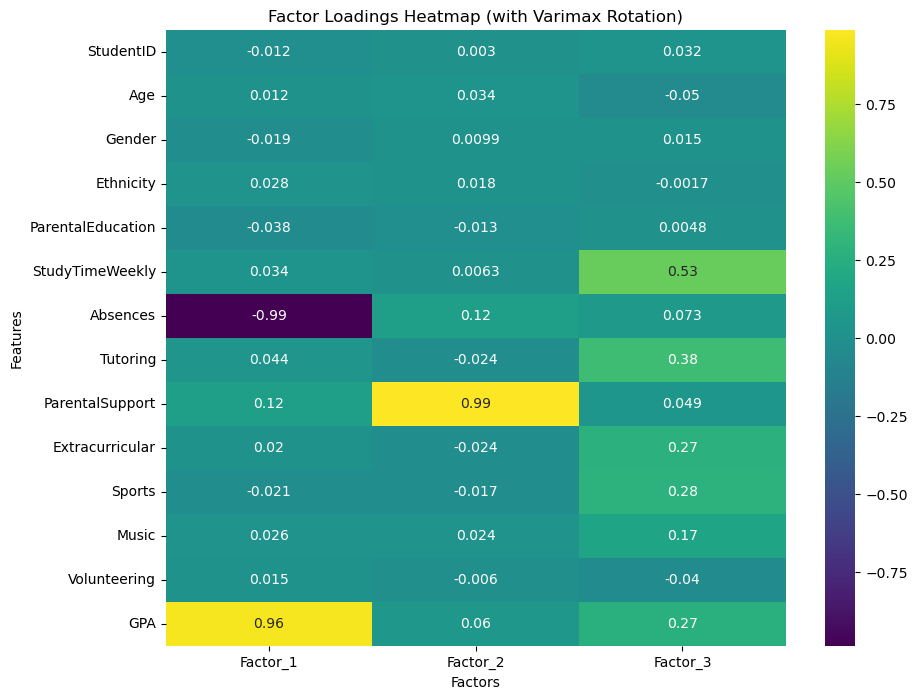

In [26]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **1 Factor**

In [28]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=1, rotation='varimax', method='ml')
fa.fit(features_scaled)

C:\Users\theroot\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:663: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


FactorAnalyzer(method='ml', n_factors=1, rotation='varimax', rotation_kwargs={})

In [29]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(1)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1
StudentID          0.003058
Age               -0.000591
Gender             0.013664
Ethnicity         -0.027813
ParentalEducation  0.036042
StudyTimeWeekly   -0.174513
Absences           0.921117
Tutoring          -0.141928
ParentalSupport   -0.185932
Extracurricular   -0.091642
Sports            -0.055149
Music             -0.071723
Volunteering      -0.003670
GPA               -0.997512


In [30]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.999991
Age                  1.000000
Gender               0.999813
Ethnicity            0.999226
ParentalEducation    0.998701
StudyTimeWeekly      0.969545
Absences             0.151543
Tutoring             0.979856
ParentalSupport      0.965429
Extracurricular      0.991602
Sports               0.996959
Music                0.994856
Volunteering         0.999987
GPA                  0.004970
dtype: float64


In [31]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(1)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.947522                0.139109             0.139109


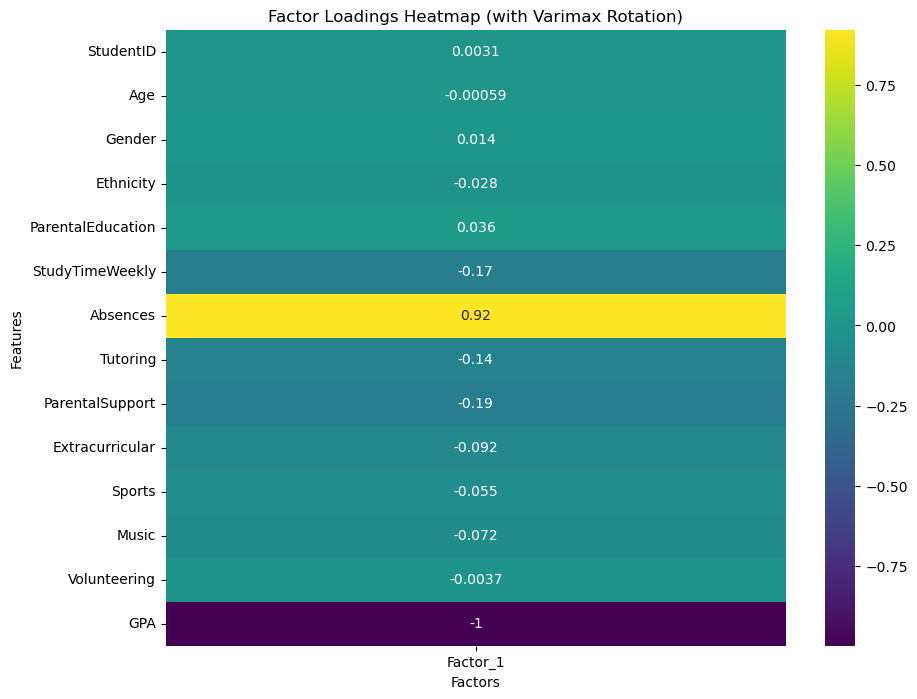

In [32]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()

# **2 Factors**

In [33]:
# Apply Factor Analysis with Varimax Rotation
fa = FactorAnalyzer(n_factors=2, rotation='varimax', method='ml')
fa.fit(features_scaled)

FactorAnalyzer(method='ml', n_factors=2, rotation='varimax', rotation_kwargs={})

In [34]:
# Extract factor loadings
factor_loadings = pd.DataFrame(fa.loadings_, index=features.columns, 
                               columns=[f'Factor_{i+1}' for i in range(2)])
print("Factor Loadings (with Varimax Rotation):")
print(factor_loadings)

Factor Loadings (with Varimax Rotation):
                   Factor_1  Factor_2
StudentID         -0.009698  0.029954
Age                0.006703 -0.027677
Gender            -0.018284  0.019277
Ethnicity          0.027190  0.005728
ParentalEducation -0.037001  0.000090
StudyTimeWeekly    0.075370  0.470350
Absences          -0.982768  0.171008
Tutoring           0.074277  0.319813
ParentalSupport    0.084684  0.481113
Extracurricular    0.042242  0.229727
Sports             0.002415  0.242321
Music              0.038016  0.158819
Volunteering       0.012078 -0.038955
GPA                0.973347  0.218371


In [35]:
# Extract uniquenesses, variance, and cumulative variance
uniquenesses = pd.Series(fa.get_uniquenesses(), index=features.columns)
variance = fa.get_factor_variance()

# Display uniquenesses
print("\nUniquenesses:")
print(uniquenesses)



Uniquenesses:
StudentID            0.999009
Age                  0.999189
Gender               0.999294
Ethnicity            0.999228
ParentalEducation    0.998631
StudyTimeWeekly      0.773090
Absences             0.004923
Tutoring             0.892202
ParentalSupport      0.761359
Extracurricular      0.945441
Sports               0.941275
Music                0.973331
Volunteering         0.998337
GPA                  0.004911
dtype: float64


In [36]:
# Display variance explained by each factor
ss_loadings, prop_var, cum_var = variance
variance_df = pd.DataFrame({
    'SS Loadings': ss_loadings,
    'Proportion of Variance': prop_var,
    'Cumulative Variance': cum_var
}, index=[f'Factor_{i+1}' for i in range(2)])
print("\nVariance Explained by Factors:")
print(variance_df)


Variance Explained by Factors:
          SS Loadings  Proportion of Variance  Cumulative Variance
Factor_1     1.937569                0.138398             0.138398
Factor_2     0.772211                0.055158             0.193556


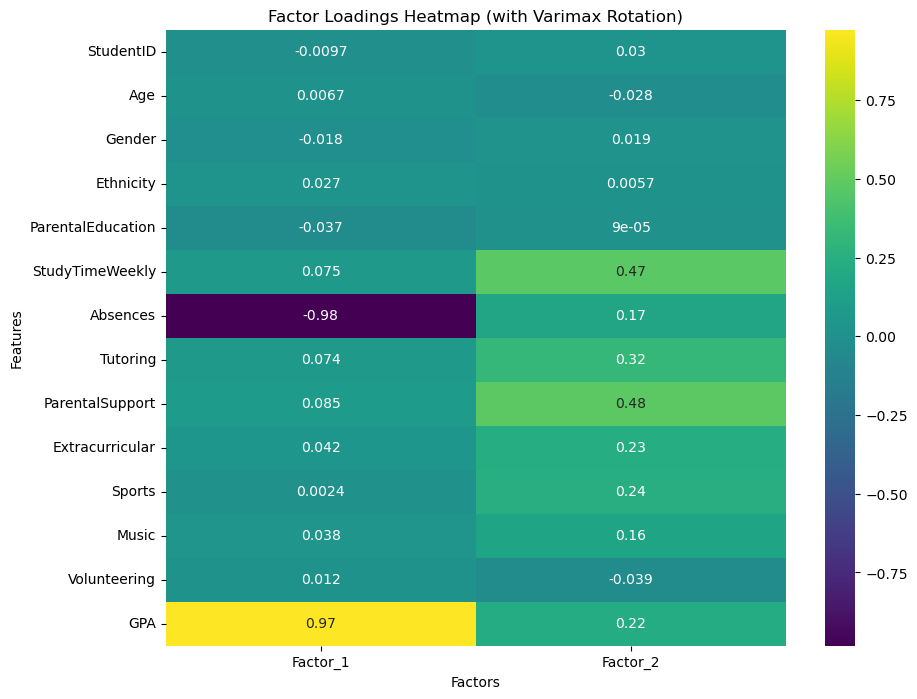

In [37]:
# Visualize the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap (with Varimax Rotation)')
plt.xlabel('Factors')
plt.ylabel('Features')
plt.show()